# **Introduction**

This analysis is of the case study-1 from google data analytics certification course. It’s originally based on the case study “Sophisticated, Clear, and Polished" Divvy and Data Visualization written by Kevin Hartman [click here](http://https://http://divvy-tripdata.s3.amazonaws.com/index.html) to visit the data sets. We will be using the Divvy dataset for this case study.

In this capstone project I will use the below steps for my analysis.
1. Ask
2. Prepare
3. Process
4. Analyse
5. Share
6. Act

## **scenario**

I am a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# **Ask**

Our main task is to identify, How do annual members and casual riders use Cyclistic bikes differently?
and in the process of achieving the results I will follow the below checklist.

1. A description of all data sources used
2. Documentation of any cleaning or manipulation of data
3. A summary of my analysis
4. Supporting visualizations and key findings
5. My top three recommendations based on my analysis

# **Prepare and Process**

Now we will start with the prepare and process stages of data analytics.

In [1]:
#loading the required packages.
library(tidyverse) # for data import and wrangling
library(ggplot2) # for visualization
library(readr) # to read the csv files
library(skimr) # to skim the date
library(lubridate) # for date functions
library(dplyr) # for dplyr functions

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# uploading the datasets in for the analysis
Q1_2019 <- read.csv("../input/cyclist-data/Divvy_Trips_2019_Q1.csv")
Q2_2019 <- read.csv("../input/cyclist-data/Divvy_Trips_2019_Q2.csv")
Q3_2019 <- read.csv("../input/cyclist-data/Divvy_Trips_2019_Q3.csv")
Q4_2019 <- read.csv("../input/cyclist-data/Divvy_Trips_2019_Q4.csv")

# Checking the column names of data frame.
colnames(Q1_2019)
colnames(Q2_2019)
colnames(Q3_2019)
colnames(Q4_2019)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "X01...Rental.Details.Rental.ID"                   
 [2] "X01...Rental.Details.Local.Start.Time"            
 [3] "X01...Rental.Details.Local.End.Time"              
 [4] "X01...Rental.Details.Bike.ID"                     
 [5] "X01...Rental.Details.Duration.In.Seconds.Uncapped"
 [6] "X03...Rental.Start.Station.ID"                    
 [7] "X03...Rental.Start.Station.Name"                  
 [8] "X02...Rental.End.Station.ID"                      
 [9] "X02...Rental.End.Station.Name"                    
[10] "User.Type"                                        
[11] "Member.Gender"                                    
[12] "X05...Member.Details.Member.Birthday.Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

In [3]:
# Making all the Column headers consistent to combine the data frames into single data frame.
(Q1_2019 <- rename(Q1_2019 ,
            ride_id = trip_id,
            rideable_type = bikeid,
            started_at = start_time,
            ended_at = end_time,
            start_station_name = from_station_name,
            start_station_id = from_station_id,
            end_station_name = to_station_name,
            end_station_id = to_station_id,
            member_casual = usertype))
(Q2_2019 <- rename(Q2_2019,
            ride_id = "X01...Rental.Details.Rental.ID",
            rideable_type = "X01...Rental.Details.Bike.ID",
            started_at = "X01...Rental.Details.Local.Start.Time",
            ended_at = "X01...Rental.Details.Local.End.Time",
            start_station_name = "X03...Rental.Start.Station.Name",
            start_station_id = "X03...Rental.Start.Station.ID",
            end_station_name = "X02...Rental.End.Station.Name",
            end_station_id = "X02...Rental.End.Station.ID",
            member_casual = "User.Type"))
(Q3_2019 <- rename(Q3_2019 ,
            ride_id = trip_id,
            rideable_type = bikeid,
            started_at = start_time,
            ended_at = end_time,
            start_station_name = from_station_name,
            start_station_id = from_station_id,
            end_station_name = to_station_name,
            end_station_id = to_station_id,
            member_casual = usertype))
(Q4_2019 <- rename(Q4_2019 ,
            ride_id = trip_id,
            rideable_type = bikeid,
            started_at = start_time,
            ended_at = end_time,
            start_station_name = from_station_name,
            start_station_id = from_station_id,
            end_station_name = to_station_name,
            end_station_id = to_station_id,
            member_casual = usertype))

# Convert ride_id and rideable_type to character, so that they can stack correctly

Q4_2019 <-  mutate(Q4_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
Q3_2019 <-  mutate(Q3_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
Q2_2019 <-  mutate(Q2_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type))
Q1_2019 <-  mutate(Q1_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type))

#  Combining all the Data frames into a one single Data frame 
all_trips <- bind_rows(Q1_2019,Q2_2019,Q3_2019,Q4_2019)

# Lets remove few columns as these were dropped in the year 2020 data.
all_trips <- all_trips %>%
  select(-c(birthyear, gender, 
            "X01...Rental.Details.Duration.In.Seconds.Uncapped",
            "X05...Member.Details.Member.Birthday.Year",
            "Member.Gender", "tripduration"))

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983
21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984
21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990
21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995


ride_id,started_at,ended_at,rideable_type,X01...Rental.Details.Duration.In.Seconds.Uncapped,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,Member.Gender,X05...Member.Details.Member.Birthday.Year
<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257.0,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999
22178535,2019-04-01 00:26:33,2019-04-01 00:35:41,6418,548.0,503,Drake Ave & Fullerton Ave,500,Central Park Ave & Elbridge Ave,Subscriber,Male,1969
22178536,2019-04-01 00:29:48,2019-04-01 00:36:11,4513,383.0,260,Kedzie Ave & Milwaukee Ave,499,Kosciuszko Park,Subscriber,Male,1991
22178537,2019-04-01 00:32:07,2019-04-01 01:07:44,3280,"2,137.0",211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,,NA


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992
23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,,NA
23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,,NA
23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,,NA
23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,,NA
23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990
23479394,2019-07-01 00:02:24,2019-07-01 00:23:12,3770,"1,248.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,,NA
23479395,2019-07-01 00:02:26,2019-07-01 00:28:16,5442,"1,550.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,,NA
23479396,2019-07-01 00:02:34,2019-07-01 00:28:57,2957,"1,583.0",43,Michigan Ave & Washington St,195,Columbus Dr & Randolph St,Customer,,NA


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987
25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998
25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991
25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990
25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987
25223645,2019-10-01 00:04:38,2019-10-01 00:10:51,1891,373.0,156,Clark St & Wellington Ave,226,Racine Ave & Belmont Ave,Subscriber,Female,1994
25223646,2019-10-01 00:04:52,2019-10-01 00:22:45,1061,"1,072.0",84,Milwaukee Ave & Grand Ave,142,McClurg Ct & Erie St,Subscriber,Female,1991
25223647,2019-10-01 00:04:57,2019-10-01 00:29:16,1274,"1,458.0",156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Male,1995
25223648,2019-10-01 00:05:20,2019-10-01 00:29:18,6011,"1,437.0",156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Female,1993


In [4]:
# Now, let’s  check the data structure, unique observations, NA values and lot's more using skim function.
skim(all_trips)

── Data Summary ────────────────────────
                           Values   
Name                       all_trips
Number of rows             3818004  
Number of columns          9        
_______________________             
Column type frequency:              
  character                7        
  numeric                  2        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate   min   max empty n_unique
1 ride_id                    0             1     8     8     0  3818004
2 started_at                 0             1    19    19     0  3306090
3 ended_at                   0             1    19    19     0  3238342
4 rideable_type              0             1     1     4     0     6017
5 start_station_name         0             1    10    43     0      640
6 end_station_name           0             1    10    43     0      641
7 m

Key findings:
1. 0 Missing values in the data set.
2. member_casual column has 2 unique values.
3. 640 unique start_station name where as 641 unique end_station name.
4. rideable_type column has 6017 unique values.
5. Rest the data looks good.


Assumptions and Limitations
* we need to change the name in member_casual column as the names are subscriber & customer.
* we need to add few columns like day, month, year which will provide us additional opportunities to aggregate the data
* will be adding the calculated field of ride_length
* There are some rides where tripduration shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides.

In [5]:
# Renaming the member_casual columns
all_trips <- all_trips %>% 
mutate(member_casual = recode(member_casual,"Subscriber"="member","Customer"="casual"))

# Adding some columns that will help us in the analysis part
all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

#Creating ride_length column by differentiating "ended_at" time and "started_at" time.
all_trips$ride_length <- round(difftime(all_trips$ended_at,all_trips$started_at))

# Removing negative entry as the data frame includes a few hundred entries which are negative, when bikes were taken out of docks and checked for quality.
all_trips <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

#lets fix the days of week as these are out of order
all_trips$day_of_week <- ordered(all_trips$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

In [6]:
# Lets have one final check of the data frame.
glimpse(all_trips)

Rows: 3,817,991
Columns: 15
$ ride_id            <chr> "21742443", "21742444", "21742445", "21742446", "21…
$ started_at         <chr> "2019-01-01 00:04:37", "2019-01-01 00:08:13", "2019…
$ ended_at           <chr> "2019-01-01 00:11:07", "2019-01-01 00:15:34", "2019…
$ rideable_type      <chr> "2167", "4386", "1524", "252", "1170", "2437", "270…
$ start_station_id   <int> 199, 44, 15, 123, 173, 98, 98, 211, 150, 268, 299, …
$ start_station_name <chr> "Wabash Ave & Grand Ave", "State St & Randolph St",…
$ end_station_id     <int> 84, 624, 644, 176, 35, 49, 49, 142, 148, 141, 295, …
$ end_station_name   <chr> "Milwaukee Ave & Grand Ave", "Dearborn St & Van Bur…
$ member_casual      <chr> "member", "member", "member", "member", "member", "…
$ date               <date> 2019-01-01, 2019-01-01, 2019-01-01, 2019-01-01, 20…
$ month              <chr> "01", "01", "01", "01", "01", "01", "01", "01", "01…
$ day                <chr> "01", "01", "01", "01", "01", "01", "01", "01", "01…
$ year      

### As we have successfully completed the 'Data Prepare' and 'Data processing' steps. Now we can start analysing the data with visualisation  and answering few questions.

# **Analyse**

we will start with analyse part using the visualisation.


In [7]:
# Q1. Comparison of member and casual users.
all_trips %>% group_by(member_casual) %>%
  summarise(Avg_duration =round(mean(ride_length)), 
  Median =median(ride_length),
  Max = max(ride_length),
  Min = min(ride_length))

member_casual,Avg_duration,Median,Max,Min
<chr>,<drtn>,<drtn>,<drtn>,<drtn>
casual,57 mins,26 mins,177200 mins,1 mins
member,14 mins,10 mins,150944 mins,1 mins


In [8]:
# Q2. Which users took how many rides with avg ride time throughout the year.
all_trips %>% group_by(member_casual) %>%
  summarise(num_of_rides = n(), avg_duration = round(mean(ride_length)), 
  percentage = round(n()/nrow(all_trips),2)*100) %>%
  arrange(-num_of_rides)

member_casual,num_of_rides,avg_duration,percentage
<chr>,<int>,<drtn>,<dbl>
member,2937360,14 mins,77
casual,880631,57 mins,23


Findings :

Although the number of rides taken by Member users are 54% more than the Casual users. The average ride durations of Casual users are 4 times higher than Member users.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



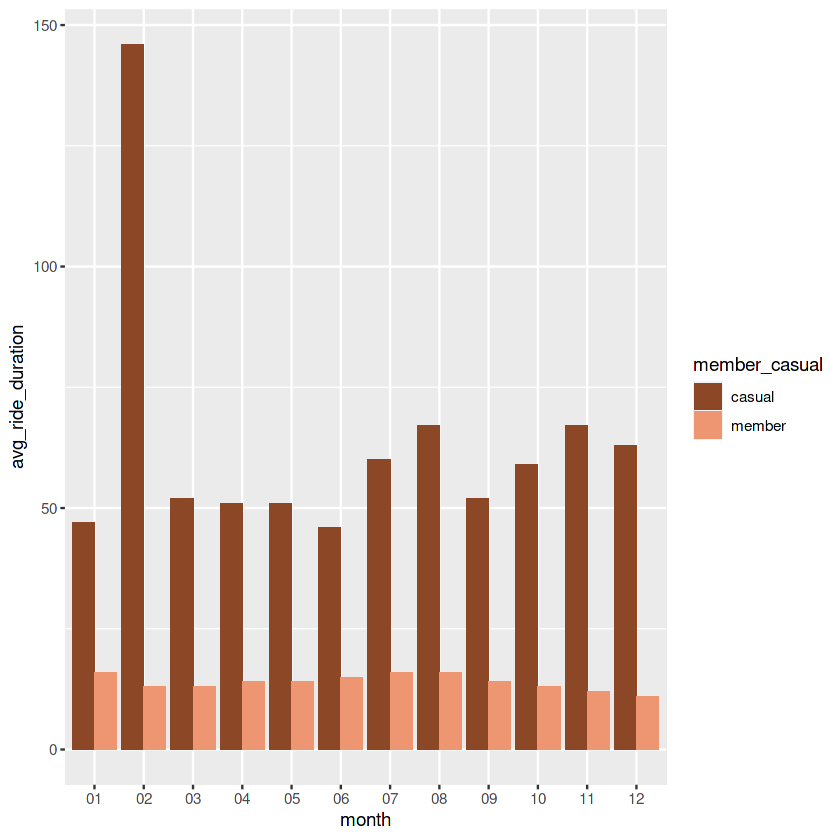

In [9]:
# Q3. Monthly avg durations

all_trips %>%
  group_by(month, member_casual) %>%
  summarize(avg_ride_duration = round(mean(ride_length)),.groups = 'drop') %>%
  ggplot(aes(x=month, y=avg_ride_duration,
             fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = c("casual" = "sienna4", "member" = "lightsalmon2"))

Findings :

February was most popular month for the Casual users whereas January, June & August for the Member users.

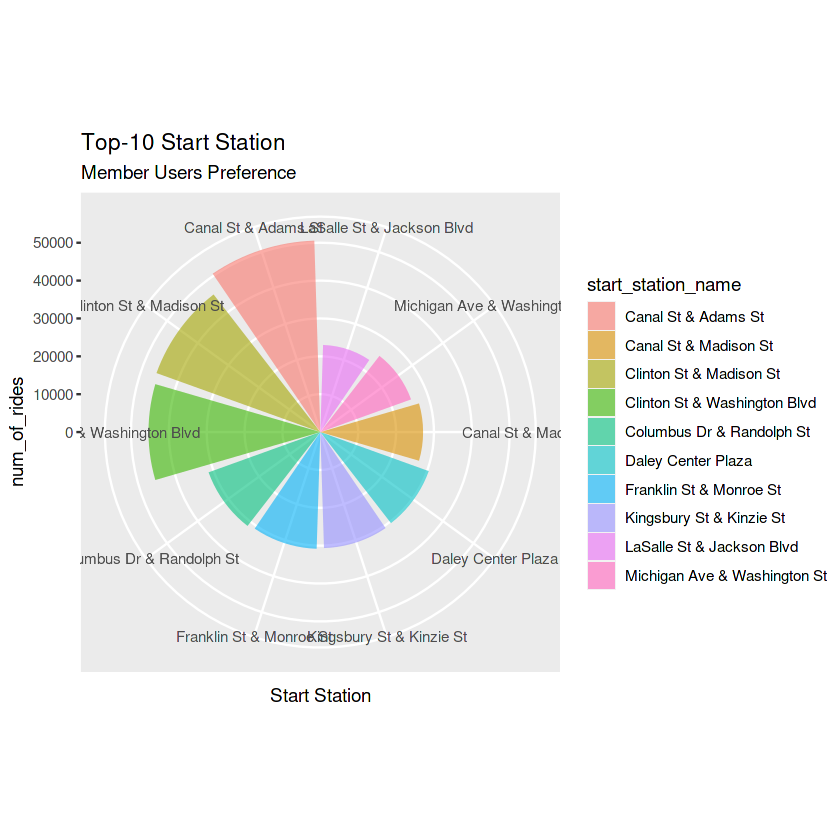

In [10]:
# Q4. Top 10 start stations of member users

all_trips %>%
           filter(member_casual == "member" & start_station_name != "missing") %>%
           group_by(start_station_name) %>%
           summarize(num_of_rides = n()) %>%
           arrange(-num_of_rides) %>%
           head(10) %>%
           ggplot(aes(x = num_of_rides, y = reorder(start_station_name, num_of_rides), fill = start_station_name)) +
           geom_col(alpha =.6) + coord_polar("y", start=0)+
           labs(title = "Top-10 Start Station", subtitle = "Member Users Preference", y = "Start Station")

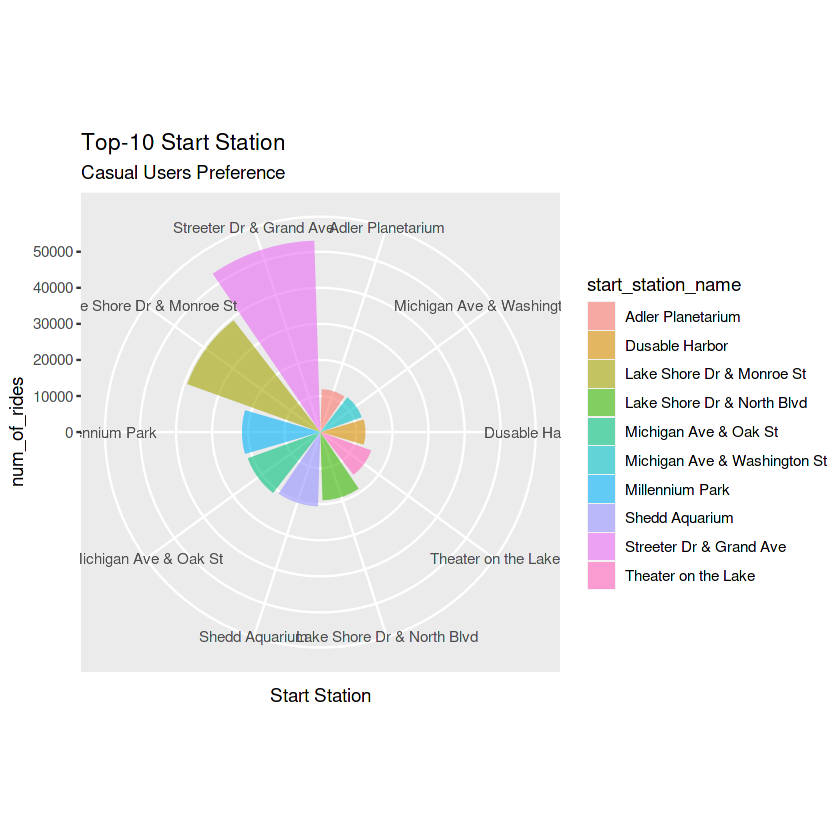

In [11]:
# Q5. Top 10 start stations of casual users

all_trips %>%
  filter(member_casual == "casual" & start_station_name != "missing") %>%
  group_by(start_station_name) %>%
  summarize(num_of_rides = n()) %>%
  arrange(-num_of_rides) %>%
  head(10) %>%
  ggplot(aes(x = num_of_rides, y = reorder(start_station_name, num_of_rides), fill = start_station_name)) +
  geom_col(alpha =.6) + coord_polar("y", start=0)+
  labs(title = "Top-10 Start Station", subtitle = "Casual Users Preference", y = "Start Station")

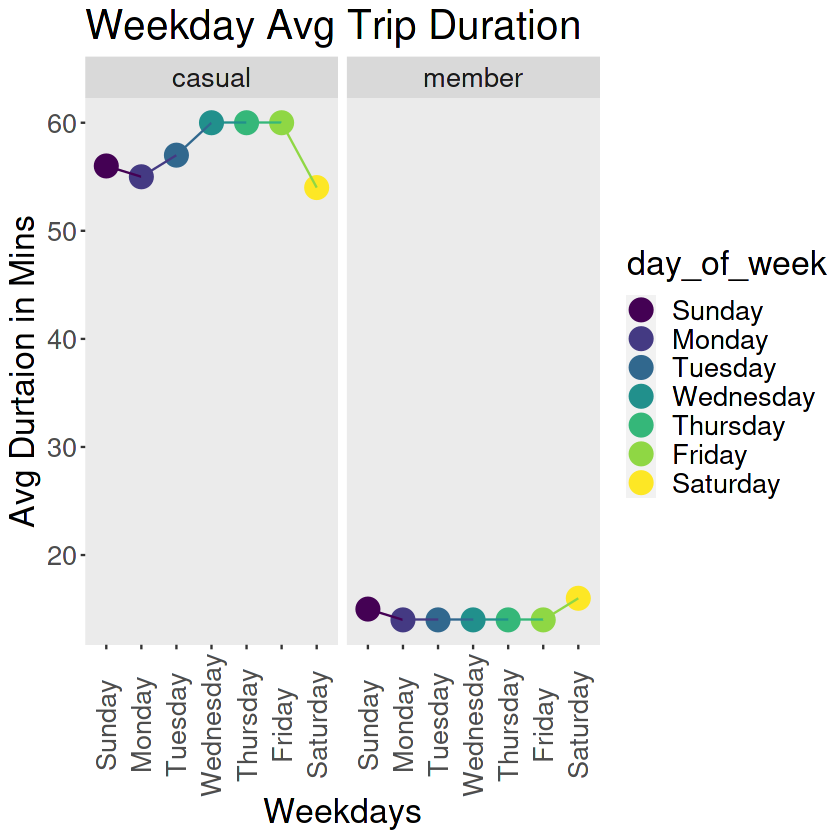

In [12]:
# Q6. Average time of weekday trips for both the users and which days are most popular.

all_trips %>%
  group_by(day_of_week, member_casual) %>%
  summarize(daily_avg = round(mean(ride_length)), .groups = "drop") %>%
  ggplot(mapping = aes(x = day_of_week, y = daily_avg, color = day_of_week , group=1)) + geom_point(size = 6) +geom_line()+
  facet_wrap(~member_casual) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(text = element_text(size = 20)) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5))+
  scale_y_continuous() +
  labs(title = "Weekday Avg Trip Duration", x = "Weekdays", y = "Avg Durtaion in Mins")

Findings :

Casual users tend to use the bike more on the Wednesday, Thursday & Fridays, whereas Member users avg ride time increases on the weekends. we can also see that the members are consistent throughout the week as there is no much ups and downs except Saturday & Sunday .


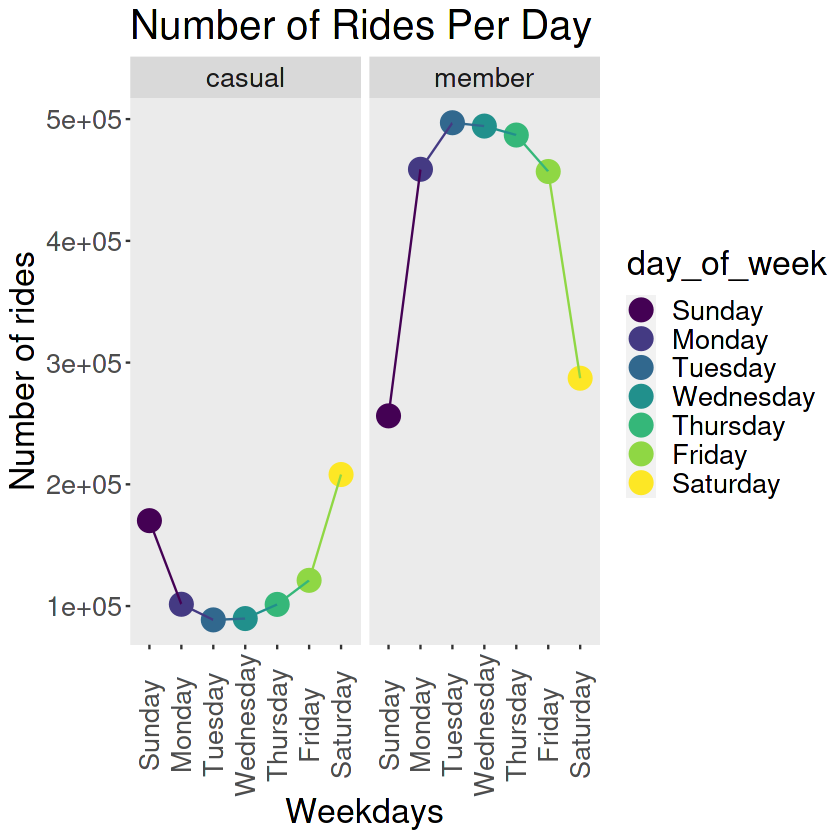

In [13]:
# Q7. Number of trips per day for both the users and which days are most popular.

all_trips %>%
  group_by(day_of_week, member_casual) %>%
  summarize(trips_per_day = n(), .groups = "drop") %>%
  ggplot(mapping = aes(x = day_of_week, y = trips_per_day, color = day_of_week , group=1)) + geom_point(size = 6) +geom_line()+
  facet_wrap(~member_casual) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(text = element_text(size = 20)) +theme(axis.text.x = element_text(angle = 90, vjust = 0.5))+
  scale_y_continuous() +
  labs(title = "Number of Rides Per Day", x = "Weekdays", y = "Number of rides")

Findings :

In this graph we can see the Number of trips on weekend for Casual users are more than rest of the week and for Member users these are less than rest of the week. this contradicts the findings of Average trip duration from Q6.



# **Conclusion of the Analysis**
1. In terms of ride duration, Casual users have the maximum ride duration of 177200 mins.
2. Member users rode 54% more number of rides throughout the year in comparison of Casual users.
3. Member users used most bikes in January, June & August whereas Casual users used maximum in the February and August months.
4. For choosing the top Start Stations, both the users seems to have separate requirements and preferences.
5. Average ride time of Casual users have always been more than the average ride time of Members.
6. Casual users preferred to ride mostly on the weekends whereas the Members used most of the bikes on Weekdays.

# **Recommendations**
1. We can provide more number of offers on the start stations which are most preferred by casual users, and do multiple promotional activities  so that we can attract more casual users to convert them to members.
2. We may give discounts or points for the weekend riders if they have the annual membership of cyclistic and providing them with the weekend passes for their rides.
3. we can give some offers for the longer rides on the weekdays in order to attract the casual users to become members and use the bikes as their work commute and daily driven.
